In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Bak=pd.read_csv('/Volumes/RAJ SANKAR/BreadBasket_DMS.csv')

In [3]:
Bak.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
Bak.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

# Inspecting the data

In [5]:
Bak.loc[Bak['Item']=='NONE',:].head()

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE


In [6]:
Bak.loc[Bak['Item']=='NONE',:].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [7]:
#or
#c = Bak[Bak['Item']=='NONE'].head()
#c

In [8]:
#c = Bak[Bak['Item']=='NONE'].count()
#c

# Dropping none values from the dataset

In [9]:
Bak=Bak.drop(Bak.loc[Bak['Item']=='NONE'].index)

In [10]:
#or
#Bak = Bak.drop(Bak[Bak['Item']=='NONE'].index)

In [11]:
Bak.loc[Bak['Item']=='NONE',:].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

# Finding out the items that are sold at the Bakery

In [12]:
print('Total number of Items sold at the bakery is:',Bak['Item'].nunique())

Total number of Items sold at the bakery is: 94


In [13]:
print('List of Items sold at the bakery:')
Bak['Item'].unique()

List of Items sold at the bakery:


array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [14]:
print('List of Items sold at the Bakery:\n')
for item in set(Bak['Item']):
    print(item)

List of Items sold at the Bakery:

Tea
Vegan Feast
Coffee granules 
Brioche and salami
Basket
Jam
Bakewell
Baguette
Art Tray
Scone
Panatone
Crisps
Keeping It Local
Cherry me Dried fruit
Alfajores
Mortimer
Spanish Brunch
Brownie
Frittata
Bare Popcorn
Valentine's card
Drinking chocolate spoons 
Tshirt
Scandinavian
Polenta
Extra Salami or Feta
Vegan mincepie
Hot chocolate
Coke
Focaccia
Hack the stack
Afternoon with the baker
Dulce de Leche
Sandwich
Medialuna
Muesli
Pick and Mix Bowls
Hearty & Seasonal
Crepes
Farm House
Mighty Protein
Fudge
The Nomad
Gift voucher
Siblings
My-5 Fruit Shoot
Smoothies
Bread
Half slice Monster 
Olum & polenta
Pintxos
Chocolates
Ella's Kitchen Pouches
Postcard
Jammie Dodgers
Caramel bites
Christmas common
Soup
Tacos/Fajita
Truffles
Eggs
Mineral water
Nomad bag
Raw bars
Spread
Honey
Argentina Night
Raspberry shortbread sandwich
Juice
Fairy Doors
Chicken Stew
Tartine
Cake
Salad
Lemon and coconut
Chicken sand
Chimichurri Oil
Coffee
Granola
Toast
Pastry
Gingerbread

In [15]:
print('Ten Most Sold Items At The Bakery')
Bak.Item.value_counts().head(10)

Ten Most Sold Items At The Bakery


Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

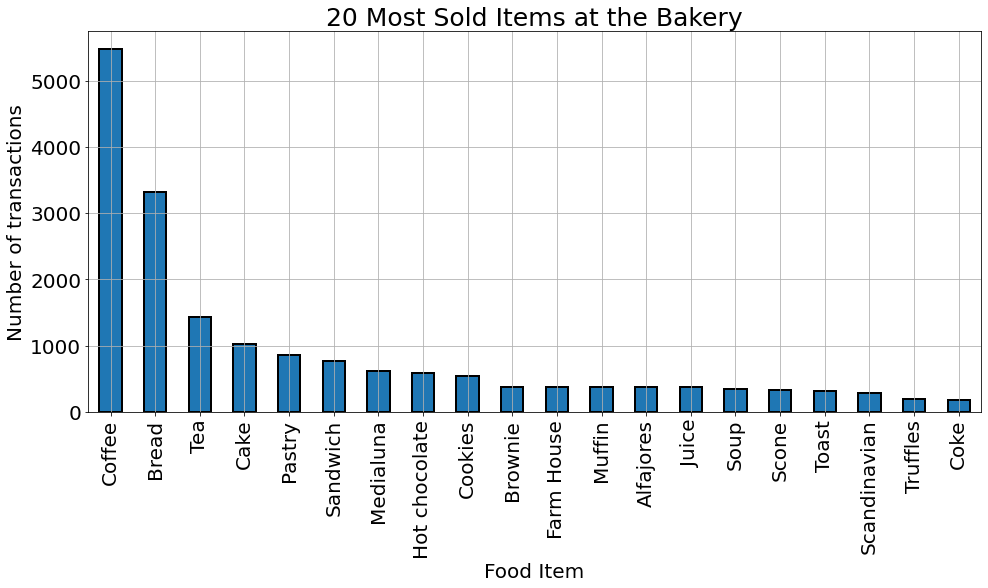

In [16]:
fig, ax=plt.subplots(figsize=(16,7))
Bak['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=25)
plt.grid()
plt.ioff()

# Business during different times of the day

In [17]:
Bak.loc[Bak['Time']<'12:00:00','Daytime']='Morning'
Bak.loc[(Bak['Time']>='12:00:00')&(Bak['Time']<'17:00:00'),'Daytime']='Afternoon'
Bak.loc[(Bak['Time']>='17:00:00')&(Bak['Time']<'20:00:00'),'Daytime']='Evening'
Bak.loc[(Bak['Time']>='20:00:00')&(Bak['Time']<'23:50:00'),'Daytime']='Night'

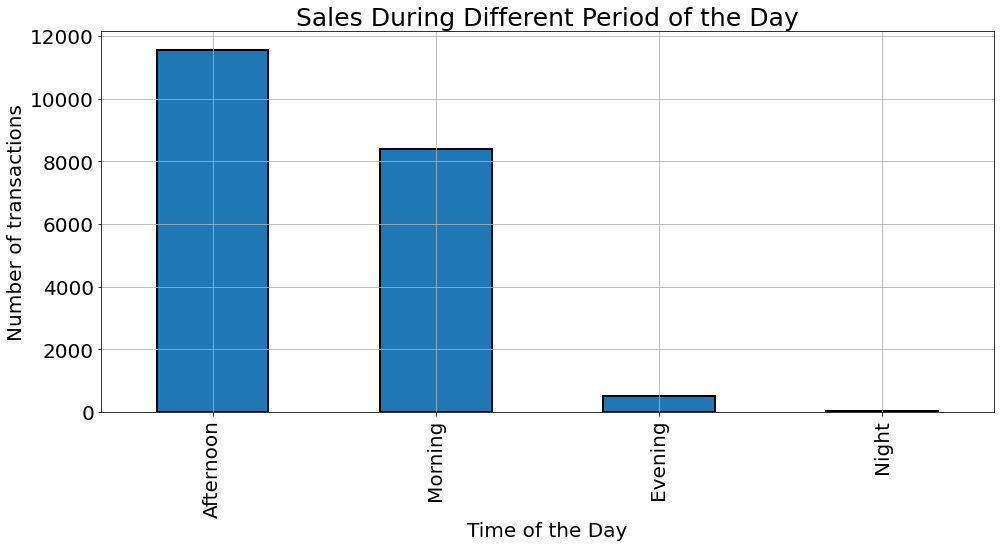

In [18]:
fig, ax=plt.subplots(figsize=(16,7))
Bak['Daytime'].value_counts().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Time of the Day',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Sales During Different Period of the Day',fontsize=25)
plt.grid()
plt.ioff()

# Sales on different days of the week

In [19]:
Bak1 = Bak.groupby(['Date']).size().reset_index(name='counts')
Bak1['Day'] = pd.to_datetime(Bak1['Date']).dt.day_name()
#Bak1

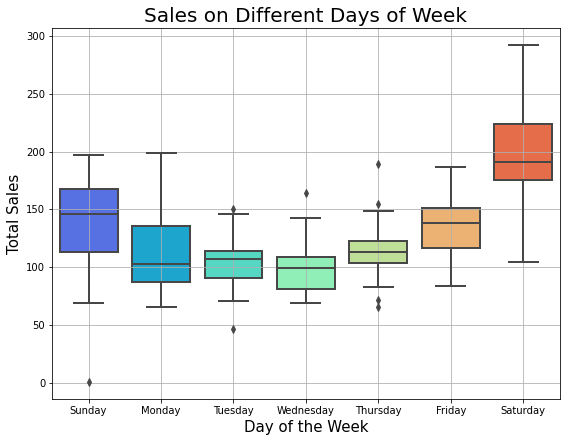

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
ax=sns.boxplot(x='Day',y='counts',data=Bak1,width=0.8,linewidth=2,palette='rainbow')
plt.xlabel('Day of the Week',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.title('Sales on Different Days of Week',fontsize=20)
ax.tick_params(labelsize=10)
plt.grid()
plt.ioff()

# We can see that maximum sales take place on saturday.This could be beacuse more tourist visit the bakery on weekends.

# Sales on different Months of the year

In [21]:
Bak['Year'] = Bak.Date.apply(lambda x:x.split('-')[0])
Bak['Month'] = Bak.Date.apply(lambda x:x.split('-')[1])
Bak['Day'] = Bak.Date.apply(lambda x:x.split('-')[2])
Bak['Hour'] =Bak.Time.apply(lambda x:int(x.split(':')[0]))
#df = df.drop(columns='Time')
Bak.head()

,Date,Time,Transaction,Item,Daytime,Year,Month,Day,Hour
0,2016-10-30,09:58:11,1,Bread,Morning,2016,10,30,9
1,2016-10-30,10:05:34,2,Scandinavian,Morning,2016,10,30,10
2,2016-10-30,10:05:34,2,Scandinavian,Morning,2016,10,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,Morning,2016,10,30,10
4,2016-10-30,10:07:57,3,Jam,Morning,2016,10,30,10


In [22]:
Bak.loc[Bak.Month == '10', 'Monthly'] = 'Oct'  
Bak.loc[Bak.Month == '11', 'Monthly'] = 'Nov' 
Bak.loc[Bak.Month == '12', 'Monthly'] = 'Dec' 
Bak.loc[Bak.Month == '01', 'Monthly'] = 'Jan' 
Bak.loc[Bak.Month == '02', 'Monthly'] = 'Feb' 
Bak.loc[Bak.Month == '03', 'Monthly'] = 'Mar' 
Bak.loc[Bak.Month == '04', 'Monthly'] = 'Apr' 
#Bak.loc[Bak.Month == '05', 'Monthly'] = 'May' 
#df.loc[df.First_name != 'Bill', 'name_match'] = 'Mis-Match' 
Bak.tail()

,Date,Time,Transaction,Item,Daytime,Year,Month,Day,Hour,Monthly
21288,2017-04-09,14:32:58,9682,Coffee,Afternoon,2017,04,09,14,Apr
21289,2017-04-09,14:32:58,9682,Tea,Afternoon,2017,04,09,14,Apr
21290,2017-04-09,14:57:06,9683,Coffee,Afternoon,2017,04,09,14,Apr
21291,2017-04-09,14:57:06,9683,Pastry,Afternoon,2017,04,09,14,Apr
21292,2017-04-09,15:04:24,9684,Smoothies,Afternoon,2017,04,09,15,Apr


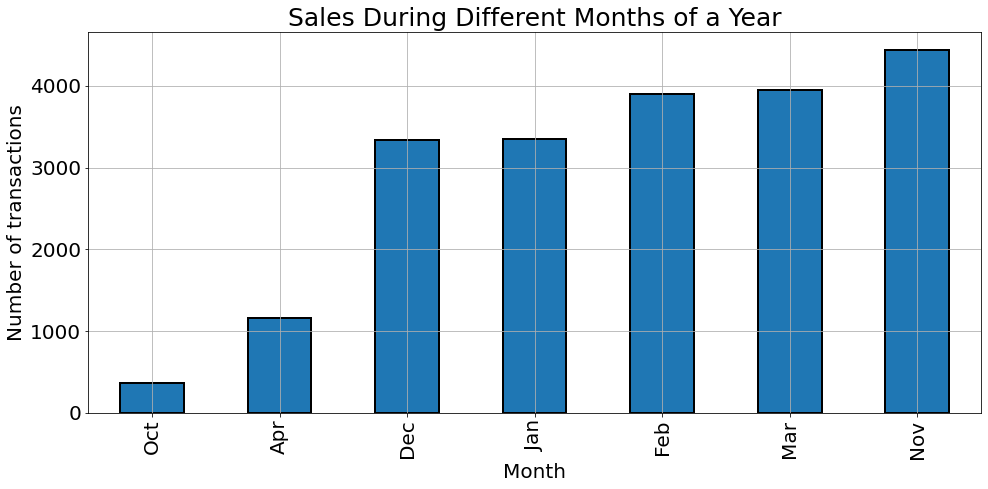

In [23]:
fig, ax=plt.subplots(figsize=(16,7))
ax=Bak.groupby('Monthly')['Item'].count().sort_values().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Sales During Different Months of a Year',fontsize=25)
plt.grid()
plt.ioff()

# Association Rule Mining via Apriori Algorithm

In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [25]:
hot_encoded_Bak=Bak.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
#Above line of code is transfrom data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.

In [26]:
hot_encoded_Bak.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Encoding the data set

In [27]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_Bak = hot_encoded_Bak.applymap(encode_units)

In [28]:
frequent_itemsets = apriori(hot_encoded_Bak, min_support=0.01, use_colnames=True)

In [29]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [30]:
rules[ (rules['lift'] >= 1.17) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


# The combition of toast and coffee has the maximum lift of 1.48.This means most cases people buying toast also buy coffee.Support 0.023 means that 2.3% of the transaction contains toast..Confidence of 0.70 means 70% of the toast purchases are accompanied with coffee..Lift 1.47 means that coffee is 1.47 times more likely to be brought when toast is brought.